# BNL data exploration

Finn O'Shea
September 21, 2021

In [27]:
# dumb overhead for using external files while they are being edited
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import matplotlib.pyplot as plt

from bnl_data_handler import BNLDataHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_1-20.h5'

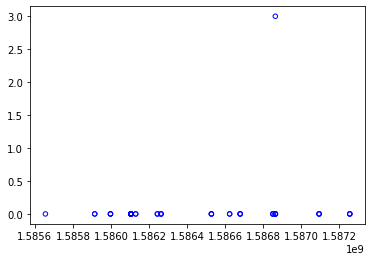

In [3]:
with h5py.File(filepointer,'r') as hdffile:
    times = hdffile['CF:CTB-DIW{}MW:FM10021-Gpm']['meta']['sec']
    statuses = hdffile['CF:CTB-DIW{}MW:FM10021-Gpm']['meta']['status']
    severities = hdffile['CF:CTB-DIW{}MW:FM10021-Gpm']['meta']['severity']
plt.scatter(times,severities,s=20,marker='o',facecolors='none',edgecolors='b')

### 2020_Apr_1-20.h5

Alarms based on Severity

In [2]:
%%timeit -n1 -r1

filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_1-20.h5'
bnl = BNLDataHandler(filepointer)
scount, sdict = bnl.countAllAlarms()
print(scount)
for k,v in sdict.items():
    print(k,' : ',v)

24
CF:CTB-DIW{}DI:InstDemand  :  11
CF:CTB-DIW{}DI:UsageToday  :  1
CF:CTB-DIW{}DP:DiplDO1-I  :  2
CF:CTB-DIW{}MW:FM10021-Gpm  :  1
CF:CTB-DIW{}MW:FM10021Usg-Today  :  2
SR-EPS{PLC:1}Sts:MstrSh-Sts  :  7
1min 43s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Alarms based on Status

In [3]:
%%timeit -n1 -r1

filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_1-20.h5'
bnl = BNLDataHandler(filepointer)
scount, sdict = bnl.countAllAlarms('status')
print(scount)
for k,v in sdict.items():
    print(k,' : ',v)

24
CF:CTB-DIW{}DI:InstDemand  :  11
CF:CTB-DIW{}DI:UsageToday  :  1
CF:CTB-DIW{}DP:DiplDO1-I  :  2
CF:CTB-DIW{}MW:FM10021-Gpm  :  1
CF:CTB-DIW{}MW:FM10021Usg-Today  :  2
SR-EPS{PLC:1}Sts:MstrSh-Sts  :  7
1min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### 2020_Apr_22-May_1.h5

Alarms based on severity

In [4]:
%%timeit -n1 -r1

filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_22-May_1.h5'
bnl = BNLDataHandler(filepointer)
scount, sdict = bnl.countAllAlarms()
print(scount)
for k,v in sdict.items():
    print(k,' : ',v)

6
CF:CTB-DIW{}DI:InstDemand  :  1
CF:CTB-DIW{}DI:UsageToday  :  1
CF:CTB-DIW{}MW:FM10021-Gpm  :  1
CF:CTB-DIW{}MW:FM10021Usg-Today  :  1
SR-EPS{PLC:1}Sts:MstrSh-Sts  :  2
46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Alarms based on status

In [5]:
%%timeit -n1 -r1

filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_22-May_1.h5'
bnl = BNLDataHandler(filepointer)
scount, sdict = bnl.countAllAlarms('status')
print(scount)
for k,v in sdict.items():
    print(k,' : ',v)

2
SR-EPS{PLC:1}Sts:MstrSh-Sts  :  2
43.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### 2020_May_9-11.h5

Alarms based on severity

In [6]:
%%timeit -n1 -r1

filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_May_9-11.h5'
bnl = BNLDataHandler(filepointer)
scount, sdict = bnl.countAllAlarms()
print(scount)
for k,v in sdict.items():
    print(k,' : ',v)

3
SR-EPS{PLC:1}Sts:MstrSh-Sts  :  3
16.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Alarms based on status

In [ ]:
%%timeit -n1 -r1

filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_May_9-11.h5'
bnl = BNLDataHandler(filepointer)
scount, sdict = bnl.countAllAlarms('status')
print(scount)
for k,v in sdict.items():
    print(k,' : ',v)

### Make a plot of one of the runs

In [31]:
filepointer = '/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_1-20.h5'
bnl = BNLDataHandler(filepointer)

traces = {}
print(bnl.filename)
with h5py.File(bnl.filename,'r') as hdffile:
    dt = hdffile['UT:SB1-Cu:1{Pmp:1}S:Actual-I']['meta'].dtype  # grab the datatypes
    statuses = np.array([],dtype=dt)
    severities = np.array([],dtype=dt)
    for key,value in hdffile.items():
        if "SR:C0" in key:
            dd = {}
            dd['value'] = value['value'][()]
            dd['time'] = value['meta'][()]['sec']
            traces[key] = dd
        if any(value['meta'][()]['status'] > 0):
            sev = value['meta'][()]['severity']
            sev = sev > 0
            severities = np.append(severities,value['meta'][()][sev])
            
            sts = value['meta'][()]['status']
            sts = sts > 0
            statuses = np.append(statuses,value['meta'][()][sts])
                

/sdf/group/ml/datasets/bes_anomaly_data/ML_NSLS2_Utils/2020_Apr_1-20.h5


In [32]:
print(statuses)
print(severities)

[(2,  3, 1585920313, 792470210) (2,  3, 1585920342, 987300787)
 (2,  3, 1585920363, 534603788) (2,  3, 1585920370,  22239035)
 (2,  3, 1585920370,  22483146) (2,  3, 1586349699, 411625848)
 (2,  3, 1586349743, 749444990) (2,  3, 1586349767, 540175424)
 (2,  3, 1586524068, 919568649) (2,  3, 1586524068, 919705828)
 (3, 14, 1586864422, 372593637) (3, 14, 1586864422, 373342158)
 (3, 14, 1586864422, 212094071) (3, 14, 1586864425, 455913372)
 (3, 14, 1586864422, 612947808) (3, 14, 1586864422, 613848970)
 (3, 14, 1586864424, 774942741) (2,  7, 1586262639,  54601975)
 (2,  7, 1586758653, 954082422) (2,  7, 1586800908, 245618653)
 (2,  7, 1586864452, 592791937) (2,  7, 1586930280, 834599160)
 (2,  7, 1587212322, 578286018) (2,  7, 1587354692, 672450893)]
[(2,  3, 1585920313, 792470210) (2,  3, 1585920342, 987300787)
 (2,  3, 1585920363, 534603788) (2,  3, 1585920370,  22239035)
 (2,  3, 1585920370,  22483146) (2,  3, 1586349699, 411625848)
 (2,  3, 1586349743, 749444990) (2,  3, 1586349767, 54

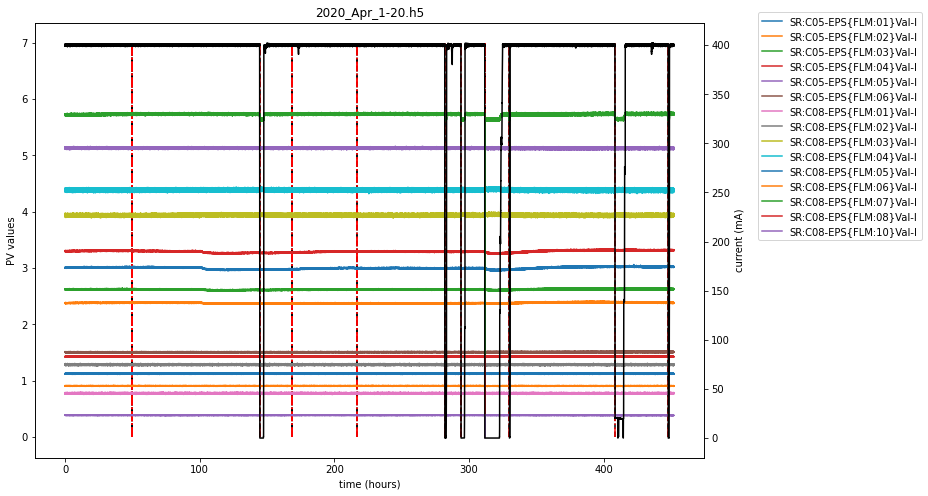

In [33]:
min_time = np.min([np.min(t['time']) for t in traces.values()])
max_time = np.max([np.max(t['time']) for t in traces.values()])
def convertTime(time):
    return (time - min_time) / 3600
fig,ax = plt.subplots(1, 1, figsize=(12,8), squeeze=True)
ax2 = ax.twinx()
for key,val in traces.items():
    if 'FLM:' in key:
        ax.plot(convertTime(val['time']), val['value'], label=key)
    elif 'DCCT' in key:
        ax2.plot(convertTime(val['time']), val['value'],'k')
            

ax.vlines(convertTime(statuses['sec']), 0, 7, colors='k', linestyle='dashed')
ax.vlines(convertTime(severities['sec']), 0, 7, colors='r', linestyle='dashdot')
#ax.vlines(convertTime(1589185200), 0, 7, colors='m', linestyle='solid')

ax.legend(loc=(1.08,0.5))
fn = bnl.filename.split('/')[-1]
plt.title('{:s}'.format(fn))
ax.set_xlabel('time (hours)')
ax.set_ylabel('PV values')
ax2.set_ylabel('current (mA)')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()